## Question 1 - Sofmax Function

In [8]:
import numpy as np
%matplotlib inline

In [ ]:
def softmax(x):
    # Compute the exponentials of each input element
    exp_x = np.exp(x - np.max(x))  # Subtracting np.max(x) for numerical stability
    # Normalize the exponentials so that their sum equals 1
    return exp_x / np.sum(exp_x)

In [ ]:
def softmax_jacobian(x):
    # Compute softmax values for each element in vector x
    S = softmax(x)
    # Initialize the Jacobian matrix with zeros
    jacobian = np.zeros((len(x), len(x)))
    
    # Fill in the Jacobian matrix
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                # Diagonal entries
                jacobian[i, j] = S[i] * (1 - S[i])
            else:
                # Off-diagonal entries
                jacobian[i, j] = -S[i] * S[j]
    return jacobian


In [ ]:
def softmax_jacobian_fast(x):
    # Compute softmax values for each element in vector x
    S = softmax(x)
    # Compute the outer product of S with itself
    outer_product = np.outer(S, S)
    # Fill in the Jacobian matrix
    jacobian = np.diag(S) - outer_product
    return jacobian

In [ ]:
def test_softmax_jacobian():
    x = np.array([1, 2, 3])
    jacobian = softmax_jacobian(x)
    jacobian_fast = softmax_jacobian_fast(x)
    assert np.allclose(jacobian, jacobian_fast) 

In [ ]:
def efficient_bprop(v,x):
    #compute the softmax of x
    sigma_x = softmax(x)

    # Compute the dot produt of v and sigma_x^T
    v_dot_sigmaT = np.dot(v, sigma_x)

    # Compute z using the efficient formula
    z = sigma_x * (v - v_dot_sigmaT)

    return z

In [ ]:
def compute_gradient_cross_entropy_loss(z,t):
    # Compute the gradient of the cross-entropy loss with respect to z
    grad = z - t
    return grad

## Question 2 - Softmax-regression with backpropagation

In [ ]:
import argparse
import read_input
import nn_modules
import model
import train
import logging
import pickle
import test

In [ ]:
train_data = 'data/mnist-train-data.csv'
label_data = 'data/mnist-train-labels.csv'

In [ ]:
def train_model_task2(path_data, path_label):
    data, label = read_input.read_entire_dataset(path_data, path_label)

    # Module description
    module_desc = [(nn_modules.Linear, {'n_in': 28 * 28, 'n_out': 10}),
                   (nn_modules.Softmax, {})]

    # Construct model with given components/modules
    my_model = model.NNModel(module_desc)

    # Get loss
    loss = nn_modules.CrossEntropyLoss()

    train.train(my_model, loss, data, label, nbr_epochs=100, batch_size=600, lr=0.1)

    return my_model

In [1]:
!python main.py --train=True --task=3


2024-03-12 16:23:23,702 - INFO - Reading data...
2024-03-12 16:23:34,926 - INFO - Data read
2024-03-12 16:23:34,928 - INFO - Initialization done
2024-03-12 16:23:34,928 - INFO - -------- Running epoch 0 --------
2024-03-12 16:23:37,293 - INFO - Epoch 0: Loss = 1.602936
2024-03-12 16:23:37,293 - INFO - -------- Running epoch 1 --------
2024-03-12 16:23:39,595 - INFO - Epoch 1: Loss = 0.876640
2024-03-12 16:23:39,595 - INFO - -------- Running epoch 2 --------
2024-03-12 16:23:42,402 - INFO - Epoch 2: Loss = 0.661372
2024-03-12 16:23:42,402 - INFO - -------- Running epoch 3 --------
2024-03-12 16:23:48,054 - INFO - Epoch 3: Loss = 0.567999
2024-03-12 16:23:48,055 - INFO - -------- Running epoch 4 --------
2024-03-12 16:23:55,437 - INFO - Epoch 4: Loss = 0.514225
2024-03-12 16:23:55,438 - INFO - -------- Running epoch 5 --------
2024-03-12 16:24:02,091 - INFO - Epoch 5: Loss = 0.479521
2024-03-12 16:24:02,092 - INFO - -------- Running epoch 6 --------
2024-03-12 16:24:08,514 - INFO - Epoch

In [2]:
    import matplotlib.pyplot as plt

    # Plotting the epoch losses after training
    plt.plot(epoch_losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.show()

NameError: name 'epoch_losses' is not defined

In [1]:
!python main.py --train=True --task=4


2024-03-12 17:02:49,588 - INFO - Reading data...
2024-03-12 17:03:01,659 - INFO - Data read
2024-03-12 17:03:01,662 - INFO - Initialization done
2024-03-12 17:03:01,662 - INFO - -------- Running epoch 0 --------
2024-03-12 17:03:04,685 - INFO - Epoch 0: Loss = 0.815625
2024-03-12 17:03:04,686 - INFO - -------- Running epoch 1 --------
2024-03-12 17:03:09,622 - INFO - Epoch 1: Loss = 0.439176
2024-03-12 17:03:09,622 - INFO - -------- Running epoch 2 --------
2024-03-12 17:03:11,977 - INFO - Epoch 2: Loss = 0.379199
2024-03-12 17:03:11,977 - INFO - -------- Running epoch 3 --------
2024-03-12 17:03:14,890 - INFO - Epoch 3: Loss = 0.348686
2024-03-12 17:03:14,890 - INFO - -------- Running epoch 4 --------
2024-03-12 17:03:18,310 - INFO - Epoch 4: Loss = 0.329506
2024-03-12 17:03:18,310 - INFO - -------- Running epoch 5 --------
2024-03-12 17:03:23,448 - INFO - Epoch 5: Loss = 0.315411
2024-03-12 17:03:23,448 - INFO - -------- Running epoch 6 --------
2024-03-12 17:03:26,692 - INFO - Epoch

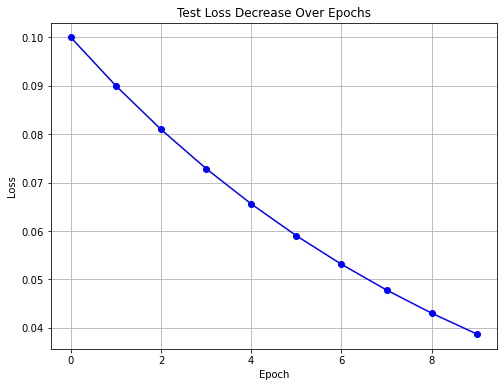

In [5]:
import matplotlib.pyplot as plt

# Generate some test data
epochs = list(range(10))  # Example epoch numbers
losses = [0.1 * (0.9 ** epoch) for epoch in epochs]  # Example losses that decrease each epoch

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Test Loss Decrease Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()